# Simulated annealing
### Carl Fredrik Berg, NTNU, 2023

This section will briefly explain the <i>simulated annealing</i> algorithm. This is an optimization algorithm that is mostly used for discrete problems, but can be used more generally. It can be combined with other optimization algorithms, to help avoid being trapped in local optima.

The algorithm relies on a <i>temperature</i> $T$. This is not a physical temperature, but rather a variable that describe how much you are allowed to move in the "wrong direction", i.e., away the optimum you are searching. However, the algorithm, including its name, originates from physical processes of heat treatment, where the physical and chemical properties of materials change with changing temperature and the speed of heating/cooling.

Assume we have an objective function $f \colon S \to \mathbb{R}$. Here $S$ is a space of possible states $s$. As we are often working with discrete problems, we say that the space we are working in is a space consists of states, and not a subspace of a space of real numbers. 

The algorithm is iterative, and we start with our counter $k=0$, and initiate with a state $s_0$. For each iteration $k$ we set the temperature $T$ to
\begin{equation}
T=1-\frac{k+1}{k_m}
\end{equation}
where $k_m$ is the maximum number of iterations (in our typical python world, we start counting at 0, and end counting at $k_m-1$, i.e., we exclude the maximum number of iteration). Note that the temperature goes towards zero from above, as the fraction starts with a small number and will go closer and closer to 1.

Pick a test-state $s_n$ according to your chosen algorithm. This could be chosen by a similar technique as all the other optimization algorithms we have considered, or just a random perturbation of the state $s$.

We now either choose the new test state $s_n$ or keep the old state $s$ by a probability that is depending on the difference in objective functions $f(s_n) - f(s)$ and the temperature. The better the objective for the test candidate $s_n$ compared to $s$, the more likely is should be to shift from $s$  to $s_n$. The higher the temperature, the more likely we are to do a random shift.

A common acceptance probability function $P(s,s_n,T)$ is given as
\begin{equation}
 P(s,s_n,T) = 
 \begin{cases}
 1 & \text{ if } f(s_n)<f(s) \\
 e^{-\frac{f(s_n)-f(s)}{T}} & \text{ if } f(s_n) \geq f(s)
 \end{cases}
\end{equation}
and we let $s=s_n$ if $P(s,s_n,T)$ is larger than a random number between 0 and 1.

Below, we will use this algorithm to find the shortest path between a set of points. The objective function is then the path length for the given ordering of the set of points. To test new possible paths, we randomly shuffle the set of points, thus give it a new ordering.

Below we have implement a simulated annealing algorithm in python to solve this problem.


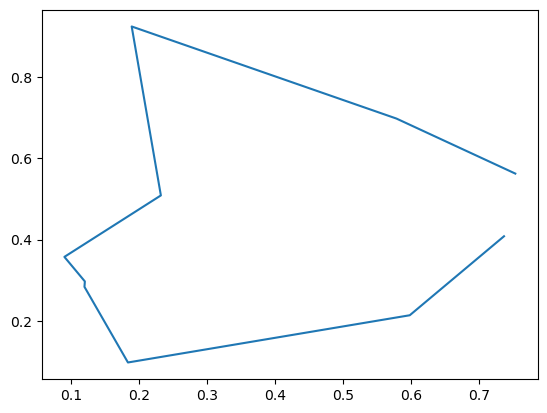

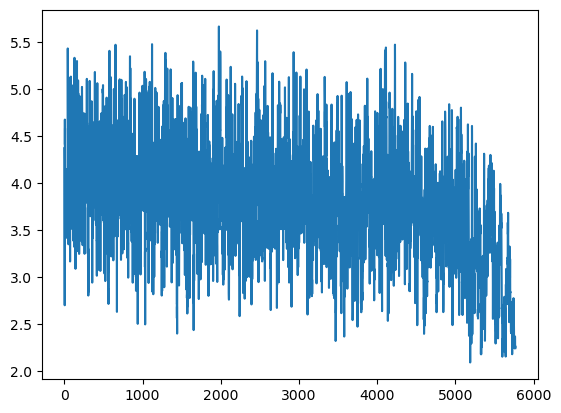

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt


numPoints=10
dimension=2

def startPoint():
    aaPoints=np.random.uniform(0,1,(numPoints,dimension))
    return aaPoints

def objectiveFunction(aaPoints):
    obj=0.0
    for ii in range(numPoints-1):
        curVal=0.0
        for jj in range(dimension):
            curVal+=(aaPoints[ii+1,jj]-aaPoints[ii,jj])**2
        obj+=np.sqrt(curVal)
    return obj


def nextPoint(aaPoints):
    aaNewPoints=np.copy(aaPoints)
    sh1=random.randint(0,numPoints-1)
    sh2=random.randint(0,numPoints-1)
    while sh1==sh2:
        sh2=random.randint(0,numPoints-1)
    tempPoint=np.copy(aaNewPoints[sh1,:])
    aaNewPoints[sh1,:]=np.copy(aaNewPoints[sh2,:])
    aaNewPoints[sh2,:]=np.copy(tempPoint)
    #np.random.shuffle(aaNewPoints)
    return aaNewPoints


def tempFunc(step,maxStep):
    return 1-step/maxStep

def acceptanceFunc(objective,nextObjective,temp):
    # if nextObjective<objective:
    #     returnValue=1
    # else:
    #     returnValue=np.exp(-(nextObjective-objective)/temp)
    return np.exp(-(nextObjective-objective)/temp)


def simulatedAnnealing(startPoint,objectiveFunction,nextPoint,acceptanceFunc,tempFunc,maxSteps):
    state = startPoint()
    objective = objectiveFunction(state)
    states, objectives = [state], [objective]
    for step in range(maxSteps):
        currentTemp = tempFunc(step,maxSteps)
        nextState = nextPoint(state)
        nextObjective = objectiveFunction(nextState)
        randNum=random.random()
        if acceptanceFunc(objective, nextObjective, currentTemp) > randNum:
            # print('Change occuring',objective,nextObjective,acceptanceFunc(objective, nextObjective, currentTemp),randNum)
            # print(state)
            # print(nextState)
            # plt.plot(state[:,0],state[:,1],color='b')
            # plt.plot(nextState[:,0],nextState[:,1],color='r',linestyle='dashed')
            # plt.show()
            state, objective = np.copy(nextState), nextObjective
            states.append(np.copy(state))
            objectives.append(objective)
    return state, objectiveFunction(state), states, objectives


bestState, bestObj, states, objectives = simulatedAnnealing(startPoint,objectiveFunction,nextPoint,acceptanceFunc,tempFunc,maxSteps=10000)

plt.plot(bestState[:,0],bestState[:,1])
plt.show()

plt.plot(objectives)
plt.show()
